<a href="https://colab.research.google.com/github/vidyadhawal/Campus_placement_Data_Analysis/blob/master/Campus_Placement_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis and Machine Learning on Campus Placement Data**

The dataset I'm using is campus placement dataset from kaggle.
This data set consists of Placement data of students in  campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

**Data Analysis** is all about finding some intersting insights in the data and we can find more insight by asking more questions and here I'm going to find some interesting insights in the data by asking the following questions:

1. To get placed in a company with high package which board should I choose (Central or State board) in 12th?
2. To get placed in a company with high package which board should I choose (Central or State board) in 10th?
3. Who is getting more placements girls or boys?
4. Does percentage matters for one to get placed?
5. Which degree specialization is much demanded by corporate?
6. Play with the data conducting all statistical tests.

A quick glance at the dataset description on Kaggle tells us that it has the following columns:

* sl_no : Serial Number
* gender : Gender- Male='M',Female='F'
* ssc_p : Secondary Education percentage- 10th Grade
* ssc_b : Board of Education- Central/ Others
* hsc_p : Higher Secondary Education percentage- 12th Grade
* hsc_b : Board of Education- Central/ Others
* hsc_s : Specialization in Higher Secondary Education
* degree_p : Degree Percentage
* degree_t : Under Graduation(Degree type)- Field of degree education
* workex : Work Experience
* etest_p : Employability test percentage ( conducted by college)
* specialisation : Post Graduation(MBA)- Specialization
* mba_p : MBA percentage
* status : Status of placement- Placed/Not placed
* salary : Salary offered by corporate to candidates

In [0]:
from google.colab import files

In [8]:
uploaded=files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import time
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [132]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#**Explonatory Data Analysis**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [0]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


It seems that we have some big outliers in the salary. The mean is about 2.8 lakhs with a standard deviation of about 90,000 but we have some salary that is over 9 Lakhs, which is more than 6 standard deviations away from the mean!

In [0]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Looks like we have some missing values in the "salary column". This is probably for the students who were not placed but let us just check to make sure that the students who are placed all have their salary listed.

In [0]:
# Check for missing salaries
df.query("status == 'placed'")["salary"].isnull().any()

False

Looks like all the placed students have their salaries listed

In [0]:
df['salary'].fillna(0,inplace = True)

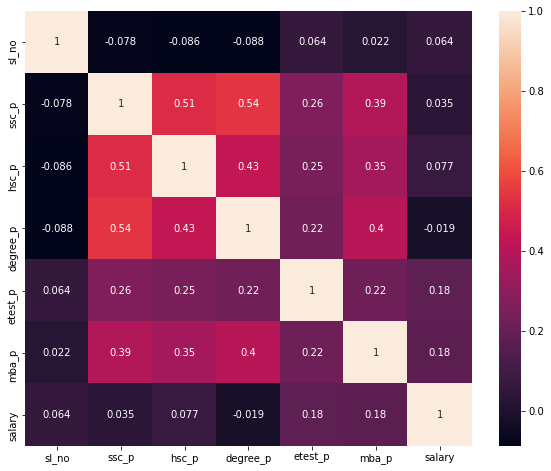

In [0]:
#Checking for corelation among columns
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

From the above heatmap, there doesnt seem to be any significant correlations present in the data.

We do however, see some weak correlation between the hsc_p, ssc_p and degree_p columns. But this is to be expected as a student who performed well in their 10th is likely to continue to work hard and perform well in their subsequent academic endeavours. The inverse may also be true.

We do see some slight correlation between salary and mba_p and etest_p. While it makes intuitive sense to me that since the recruitment is for MBA graduates, their MBA scores and E-Test scores (Employability test) might have a correlation with their chances of getting placed or salary, the data on hand does not provide us with strong enough evidence to confirm or deny the same.

#***Data Visualization***

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.



**Analyzing the Various Categorical Variables**

Let's look at the proportion of students in the following categorical variables - gender; placement status; secondary and higher secondary school boards; higher secondary school, UG and PG specializations and work experience.

**Gender, Placement Status and Secondary/Higher Secondary School Board**

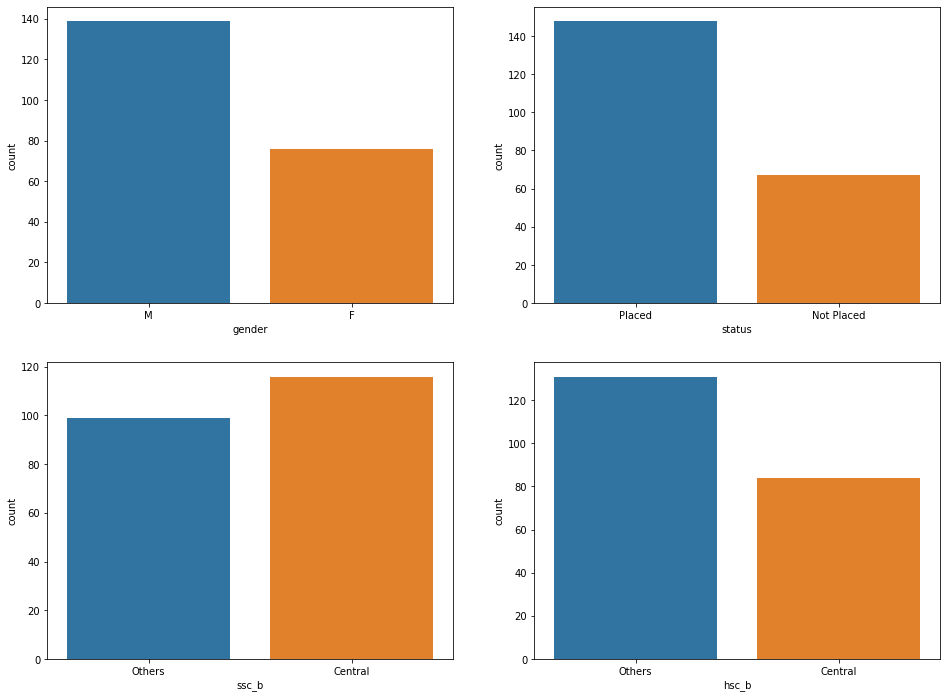

In [0]:
fig, a1 = plt.subplots(2, 2,figsize=(16,12))
sns.countplot(x = "gender", data = df, ax = a1[0,0])
sns.countplot(x = "status", data = df, ax = a1[0,1])
sns.countplot(x = "ssc_b", data = df, ax = a1[1,0])
sns.countplot(x = "hsc_b", data = df, ax = a1[1,1])
plt.show()

There is a majority of male students in this degree. The university has a placement rate of 68.84%.

Almost 54% of the students were enrolled in the Central Board when they were in secondary school. The percentage has risen to almost 61%, when they moved on to higher secondary school.

**Higher Secondary School/UG/MBA Specialisations and Work Experience**

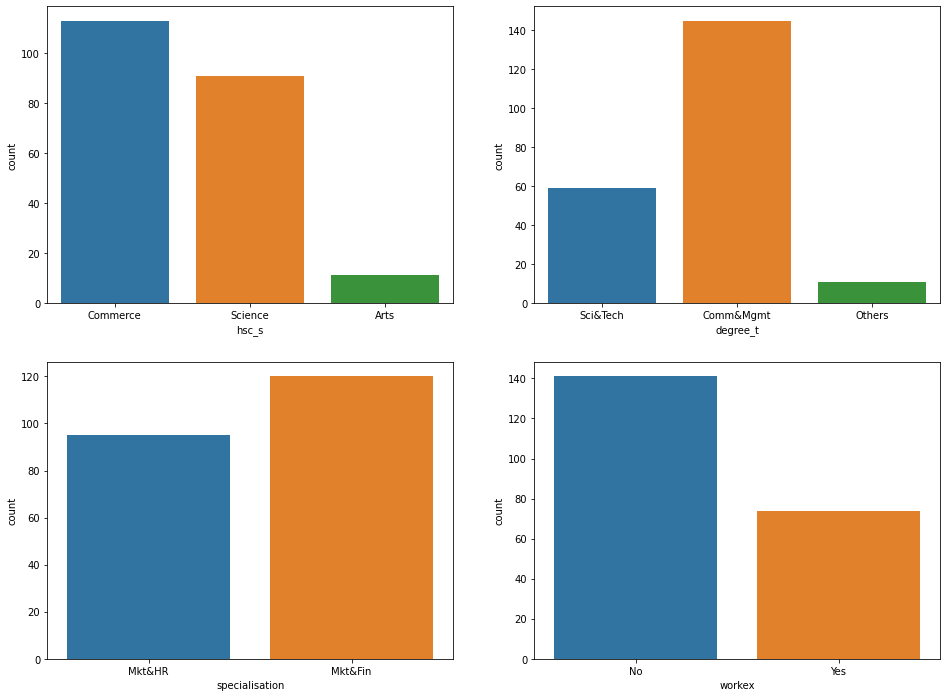

In [0]:
fig, a2 = plt.subplots(2, 2,figsize=(16,12))
sns.countplot(x = "hsc_s", data = df, ax = a2[0,0])
sns.countplot(x = "degree_t", data = df, ax = a2[0,1])
sns.countplot(x = "specialisation", data = df, ax = a2[1,0])
sns.countplot(x = "workex", data = df, ax = a2[1,1])
plt.show()

Majority of the students were enrolled commerce or science when they were in higher secondary. Howevere, there is a notable rise in students who studied commerce and management, when they were undergraduates. It could be possible that these students have planned on pursuing MBA, which requires in-depth knowledge about finance and management.

Two-thirds of the students have no work experience. 56% of the students enrolled in the Marketing and Finance, while the remaining have enrolled in Marketing and HR.

**Who is getting more placements girls or boys?**

In [0]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

we have samples of 139 male students and 76 female students

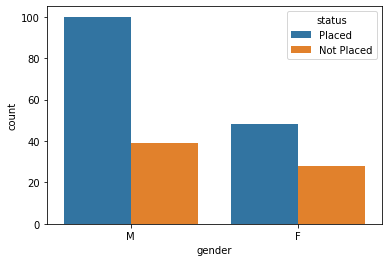

In [0]:
%matplotlib inline
sns.countplot("gender",hue="status",data=df)

The Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50, that can be seen from the plot above

Text(0.5, 0, 'Salary')

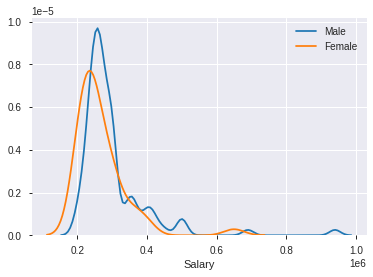

In [0]:
sns.kdeplot(df.salary[df.gender=="M"])
sns.kdeplot(df.salary[df.gender=='F'])
plt.legend(["Male","Female"])
plt.xlabel("Salary")

Male students are offered slightly higher salary than female on an average

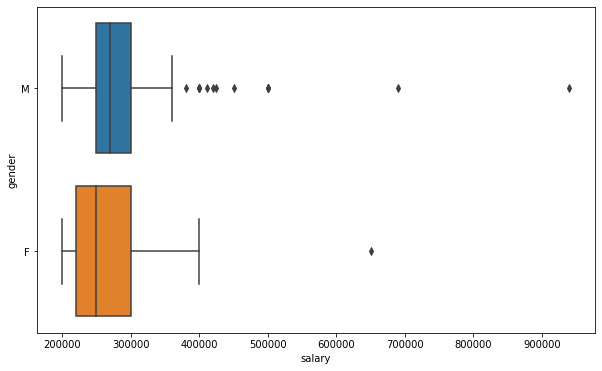

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot("salary","gender",data=df)
plt.show()

From the above plot I can infer the following details:

* The Range of salary is high for boys with the median of 2.8 Lakhs per annum
* The Median salary for girls is 2.5 Lakhs per annum
* The highest package is offered to a boy which is nearly 9.5 Lakhs per annum
* The highest package offered for girls is 6.5 Lakhs per annum
* Total number girls not placed are 30 and Total number of boys not placed are 40

The Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50

######**Does Secondary Education affect placements?**


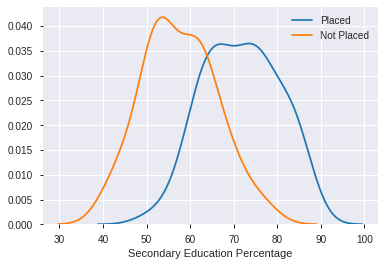

In [0]:
sns.kdeplot(df.ssc_p[df.status=="Placed"])
sns.kdeplot(df.ssc_p[df.status=="Not Placed"])
plt.legend(["Placed","Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

All students with Secondary Education Percenage below 50% are not placed.

students with good secondary education percentage are placed on average.

**To get placed in a company with high package which board should I choose (Central or State board) in 10th?**

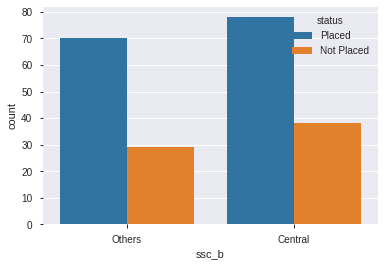

In [0]:
sns.countplot("ssc_b",hue="status",data=df)
plt.show()

Total number central board students not placed are 27 and Total number of other board student not placed are 37

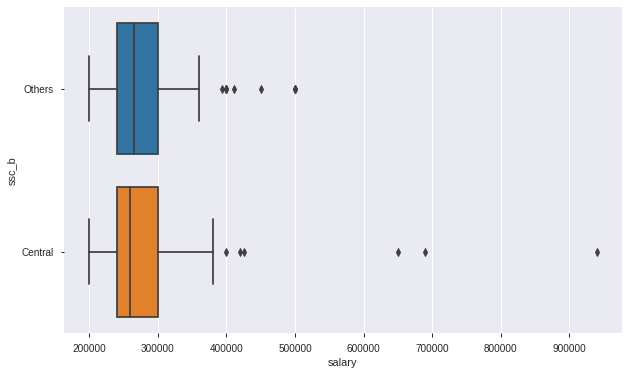

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot("salary","ssc_b",data=df)
plt.show()

From the above plot I can infer the following details:

* The Range of salary is high for central board students with the median of 2.6 Lakhs per annum
* The Median salary for other board students is 2.3 Lakhs per annum
* The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy
* The highest package offered for other board students is 5 Lakhs per annum
* Total number central board students not placed are 27 and Total number of other board student not placed are 37

Better to choose central board but the ratio is 80:70 which infers thats both the board students are getting placed and ratio of student not getting placed is 37:27 here central board students are more, so the 10th board selection doesn't matters but if you want high package go for central board

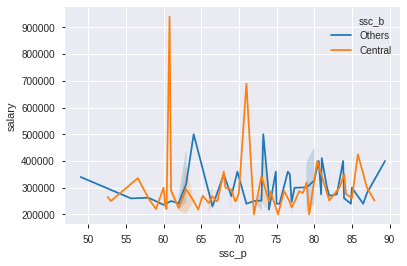

In [0]:
sns.lineplot("ssc_p","salary",hue="ssc_b",data=df)
plt.show()



*   No Specific pattern(corealtion)between Secondary Education percentage and salary
*   Board of Education is not affecting Salary




###**Do Secondary School Test Scores Affect Placement?**

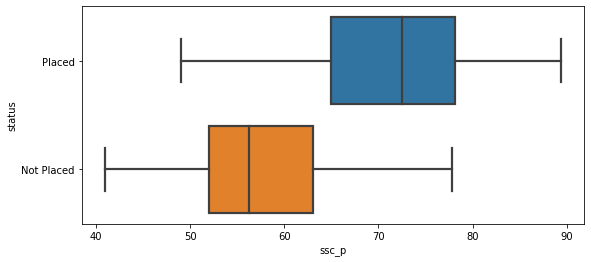

In [0]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'ssc_p', y = 'status', data = df, linewidth = 2.2)
plt.show()

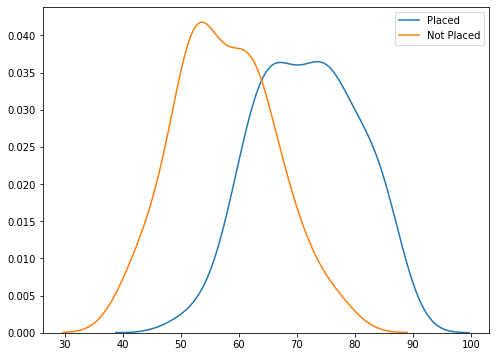

In [0]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['ssc_p'].loc[df['status']=='Placed'])
sns.kdeplot(df['ssc_p'].loc[df['status']=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.show()

In [0]:
df.groupby('status').describe()['ssc_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,57.544030,8.394246,40.89,52.0,56.28,63.000,77.8
Placed,148.0,71.721486,8.715445,49.00,65.0,72.50,78.125,89.4


Out of all the test scores, secondary school percentages seem to have the greatest influence on placements. Placed students have a higher average percentage and a higher median.

#####**Does Higher Secondary School percentage affect Placements?**

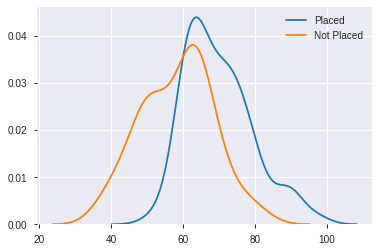

In [0]:
sns.kdeplot(df.hsc_p[df.status=="Placed"])
sns.kdeplot(df.hsc_p[df.status=="Not Placed"])
plt.legend(["Placed","Not Placed"])
plt.show()



*   More placements for percentage above 65%
*   Percentage must be atleast 60 for chance of being placed.



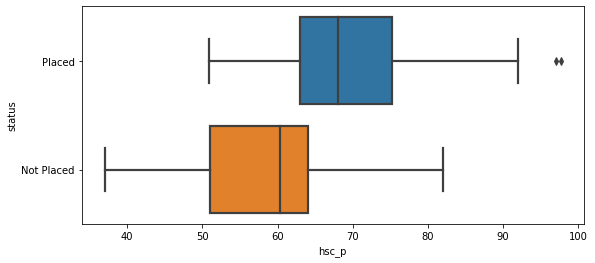

In [0]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'hsc_p', y = 'status', data = df, linewidth = 2.2)
plt.show()

In [0]:
df.groupby('status').describe()['hsc_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,58.395522,9.914090,37.00,51.0,60.33,64.00,82.0
Placed,148.0,69.926554,9.329268,50.83,63.0,68.00,75.25,97.7


Students need to score more than 60% in higher secondary school to get placed. Placed students, in general, have a higher mean and median percentage.

**To get placed in a company with high package which board should I choose (Central or State board) in 12th?**

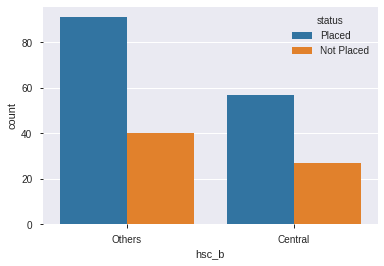

In [0]:
sns.countplot("hsc_b",hue="status",data=df)
plt.show()

Total number central board students not placed are 25 and Total number of other board student not placed are 40

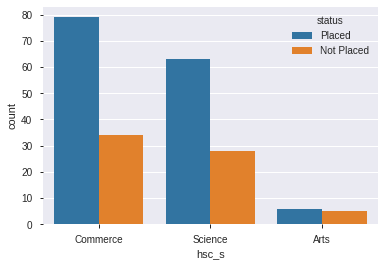

In [0]:
sns.countplot("hsc_s",hue="status",data=df)
plt.show()



*   We have very less students with Art specialization
*   Arond 2:1 placed:unplaced ratio for both Science and Commerce students



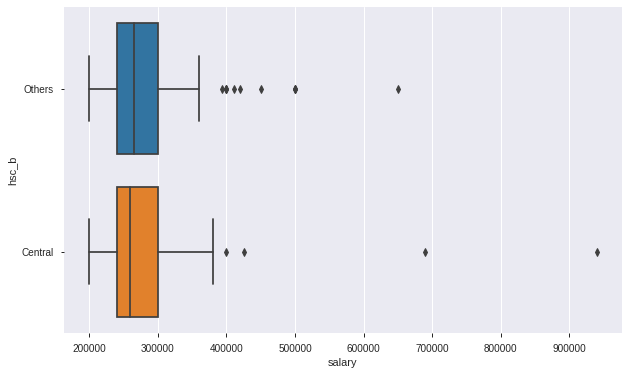

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot("salary","hsc_b",data=df)
plt.show()

From the above plot I can infer the following details:

* The Range of salary is high for central board students with the median of 2.5 Lakhs per annum
* The Median salary for other board students is 2.6 Lakhs per annum
* The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy and also his 10th board is central board
* The highest package offered for other board students is 7 Lakhs per annum


Better to choose other board and ratio is 90:50 which infers thats the other board students are getting more placed and ratio of student not getting placed is 40:25 here central board students are less which infers that most of them will get offers.If you want high package go for central board

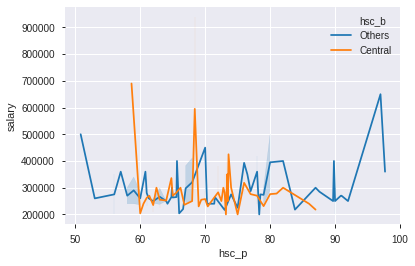

In [0]:
sns.lineplot("hsc_p","salary",hue="hsc_b",data=df)
plt.show()



*   High salary for both central and othe
*   High Salary for both high and low percentage
*   Thus,both these feature doesnot affect salary.



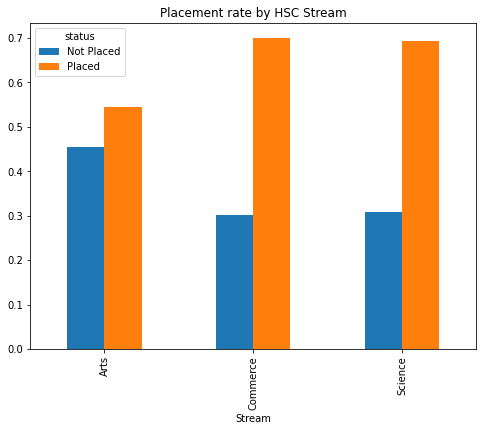

In [0]:
# Plotting placement rate by Stream
df.groupby("hsc_s").status.value_counts(normalize=True).unstack(1).plot.bar( title = "Placement rate by HSC Stream", figsize = (8,6)).set_xlabel("Stream");

Arts does seem to be lagging behind in placements but then again it has significantly fewer samples than commerce and science.

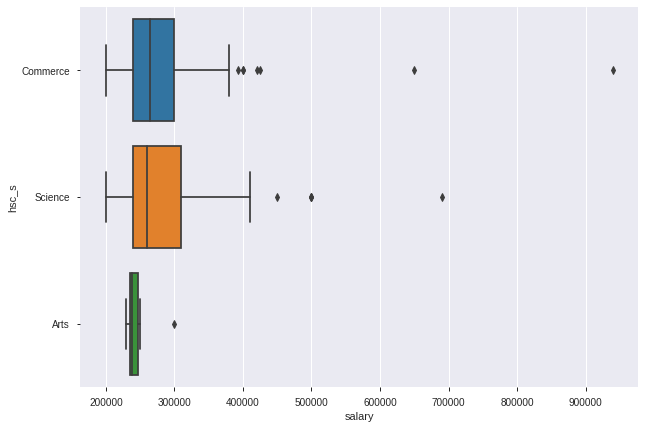

In [0]:
plt.figure(figsize=(10,7))
sns.boxplot("salary","hsc_s",data=df)
plt.show()


*   We can't really say for sure due to only few samples of students with Arts major, but they aren't getting  good salaries 
*   Looks like both science and commeerse streams have about the same spread of salaries. There are some outliers in both cases and Science does seem to have an ever-so-slightly higher third quartile value.



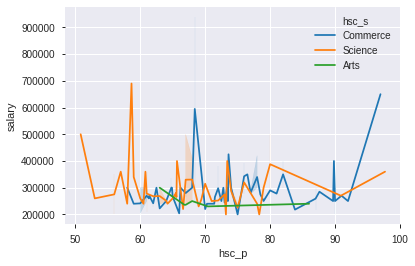

In [0]:
sns.lineplot("hsc_p","salary",hue="hsc_s",data=df)
plt.show()

students with Art specialization surprisingly have low salary

**Does Under Graduate percentage affect placements?**


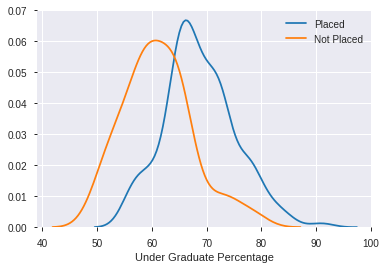

In [0]:
sns.kdeplot(df.degree_p[ df.status=="Placed"])
sns.kdeplot(df.degree_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

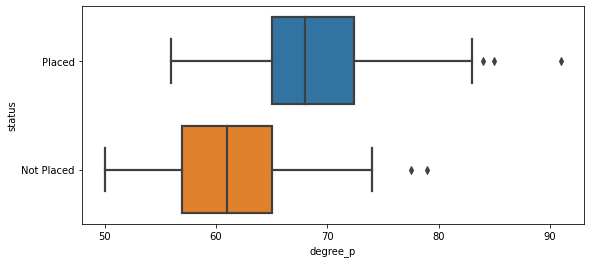

In [0]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'degree_p', y = 'status', data = df, linewidth = 2.2)
plt.show()

UG Percentage least 50% to get placement

In [0]:
df.groupby('status').describe()['degree_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,61.134179,6.365825,50.0,57.0,61.0,65.0000,79.0
Placed,148.0,68.740541,6.518087,56.0,65.0,68.0,72.4225,91.0


There is clear indication that UG degree scores have a relatively greater influence on placement, even if there is an overlap in both graphs. Students need to score more than 50% in their UG degree to get placed. Placed students, in general, have a higher average percentage.

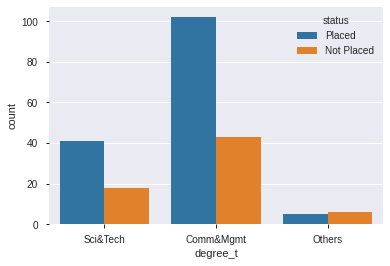

In [0]:
sns.countplot("degree_t",hue="status",data=df)
plt.show()

##**Salaries Categorized by Higher Secondary School Specialisation**

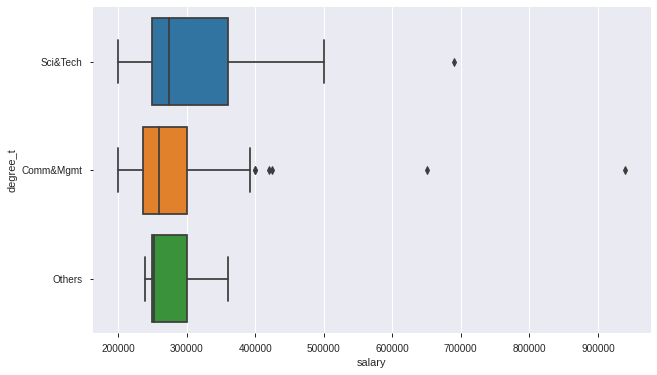

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot("salary","degree_t",data=df)

Science & Tech students getting more salary on average

In [0]:
df.groupby('hsc_s').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
hsc_s,,,,,,,,
Arts,6.0,248666.666667,26005.127699,230000.0,236000.0,238000.0,247500.0,300000.0
Commerce,79.0,287417.721519,100015.333132,200000.0,240000.0,265000.0,300000.0,940000.0
Science,63.0,294015.873016,88790.709348,200000.0,240000.0,260000.0,310000.0,690000.0


Arts students have been offered the worst salary packages out of the bunch. The range of salaries offered to science students is larger. Highest salary packages offered are ₹9,40,000 for a commerce student, ₹6,90,000 for a science student and ₹3,00,000 for an arts student.

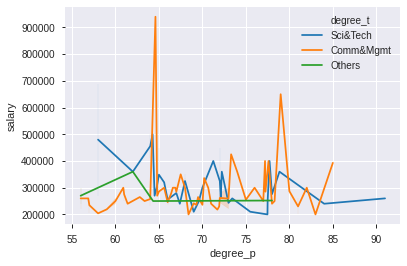

In [0]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=df)
plt.show()

***Feature: workex (Work Experience)***

**Does Work Experience affect placements?**

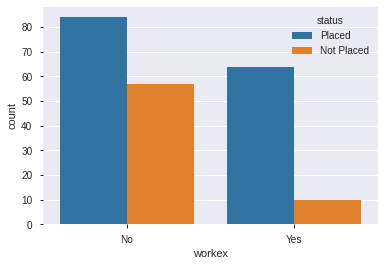

In [0]:
sns.countplot("workex",hue="status",data=df)
plt.show()

This affects Placement. Very few students with work experience not getting placed!

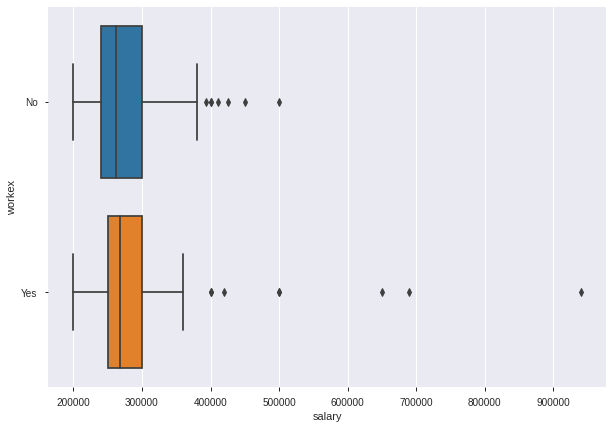

In [0]:
plt.figure(figsize=(10,7))
sns.boxplot("salary","workex",data=df)
plt.show()


*   Outliers (High salary than average) on both end but students with experience getting dream jobs
*   Average salary as well as base salary high for students with work experience.
* Having work experience makes you more valuable material for companies, and you can get a better salary.



##**Do Employability Test Scores Affect Placement?**

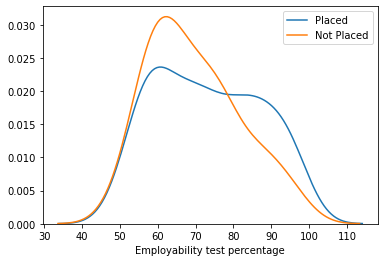

In [0]:
sns.kdeplot(df.etest_p[df.status=="Placed"])
sns.kdeplot(df.etest_p[df.status=="Not Placed"])
plt.legend(["Placed","Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

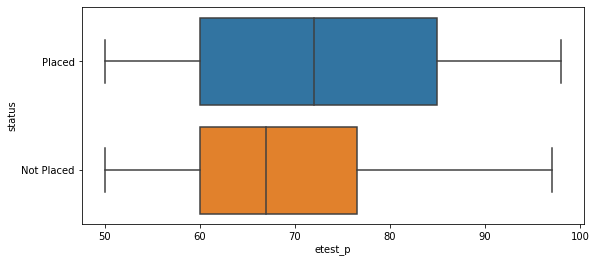

In [0]:
plt.figure(figsize=(9,4))
sns.boxplot(x="etest_p",y="status",data=df)
plt.show()

In [0]:
df.groupby("status").describe()['etest_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,69.587910,11.930687,50.0,60.0,67.0,76.5,97.0
Placed,148.0,73.238041,13.729333,50.0,60.0,72.0,85.0,98.0


The employability percentages for placed students have a higher median and average. The IQR is higher for the placed students. However, students with similar employability percentages have faced different outcomes in terms of placements. The employability tests do not seem like a clear indicator for placements, as the KDE plot above shows a major overlap of employability test percentage

###**Which degree and MBA specialization has the highest Salary?**

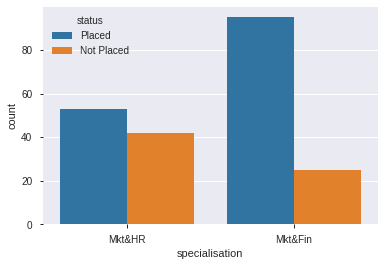

In [0]:
sns.countplot("specialisation", hue="status", data=df)
plt.show()

This feature affects Placement status.
Comparitively very low not-placed students in Mkt&Fin Section

##**Salaries Categorized by MBA Specialization**

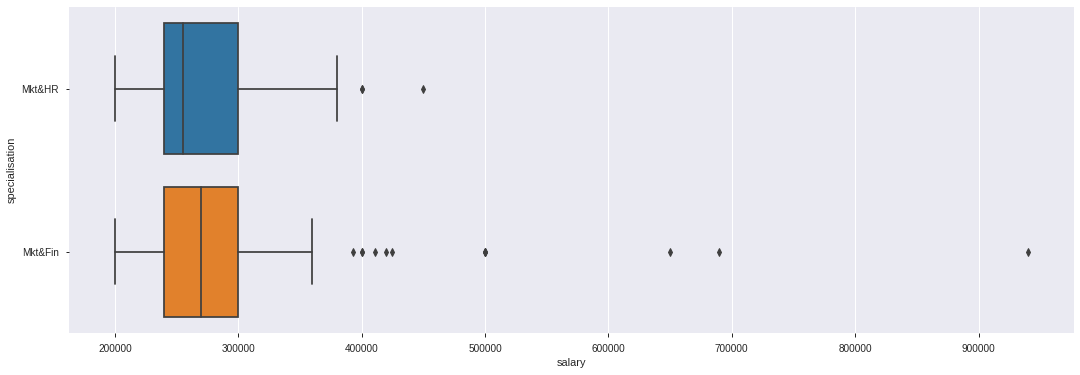

In [0]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=df)
plt.show()

In [0]:
df.groupby('specialisation').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
specialisation,,,,,,,,
Mkt&Fin,95.0,298852.631579,108190.530165,200000.0,240000.0,270000.0,300000.0,940000.0
Mkt&HR,53.0,270377.358491,54784.271471,200000.0,240000.0,255000.0,300000.0,450000.0


Marketing & Finance students have a higher average salary. The maximum salary offered to a Marketing & Finance student (₹9,40,000) is significantly larger when compared to the maximum salary of a Marketing & HR student (₹4,50,000). There are more outliers in Marketing & Finance, which means that there are more opportunities for higher paid jobs in this specialisation.

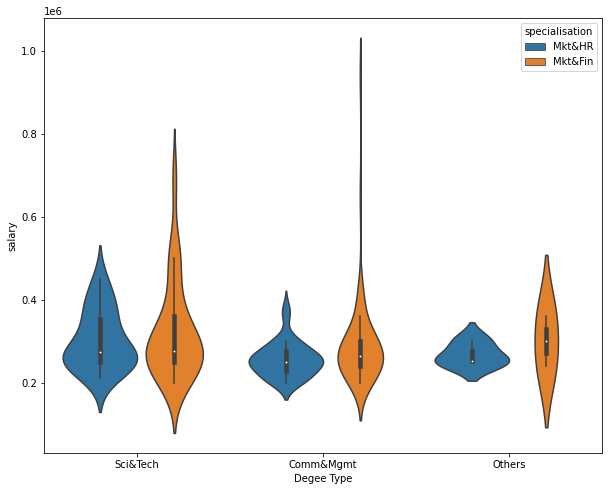

In [0]:
#Plotting Salary vs specialization and degree
plt.subplots(figsize=(10,8))
sns.violinplot(x="degree_t",y="salary",hue="specialisation",data=df)
plt.xlabel("Degee Type")
plt.ylabel("salary")
plt.show()

It seems as though the highest salaries that were offered were to students who pursued the Marketing & Finance specialisation after obtaining a UG degree in Commerce and Management. However, these are clearly major outliers. It seems than in general, Students with a Science and Technology UG degree pursuring Mkt&Fin specialization were more likely to get higher paying jobs.

***Feature: mba_p (MBA percentage)***

**Does MBA Percentage affect placements?**

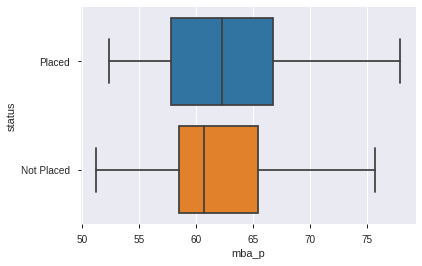

In [0]:
sns.boxplot("mba_p","status",data=df)
plt.show()

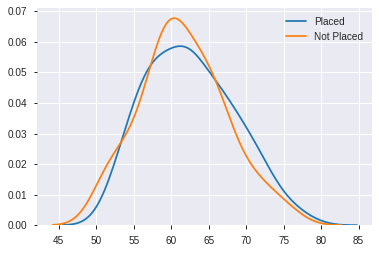

In [0]:
sns.kdeplot(df.mba_p[df.status=="Placed"])
sns.kdeplot(df.mba_p[df.status=="Not Placed"])
plt.legend(["Placed","Not Placed"])
plt.show()

Mba percentage does not affect placement much

**Plotting the Relationships between numerical columns**

#**Data Pre-Processing**

Ignoring Board of Education -> they didnt seem to have much effect

In [0]:
df.drop(["ssc_b","hsc_b",'sl_no'],axis=1,inplace=True)

##**Feature Encoding**

In [0]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

We have to encode gender,hsc_s, degree_t, workex, specialisation and status

In [0]:
# Importing LabelEncoder to convert graphical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [0]:
labelencoder = LabelEncoder()

In [0]:
df['gender'] = labelencoder.fit_transform(df['gender'])
df['hsc_s'] = labelencoder.fit_transform(df['hsc_s'])
df['degree_t'] = labelencoder.fit_transform(df['degree_t'])
df['workex'] = labelencoder.fit_transform(df['workex'])
df['specialisation'] = labelencoder.fit_transform(df['specialisation'])
df['status'] = labelencoder.fit_transform(df['status'])

In [121]:
df.head(2)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0


#**Problem Statement**



*   Predicting If Students gets placed or not (Binary Classification Problem)
*   Predicting Salary of Student (Regression Problem)



In [0]:
#Lets make a copy of data, before we proceeed with specific problems
data_clf = df.copy()
data_reg = df.copy()

In [0]:
# Seperating Features and Target
X = data_clf.drop(['status','salary'],axis=1)
y = data_clf['status']

In [0]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#**Model Selection**

###**Binary Classification Problem**

In [150]:
models = pd.DataFrame(columns=['model', 'score', 'std','Time to Train']) 
#DataFrame to store scores of all models

options = [GaussianNB(), 
           LogisticRegression(), 
           SVC(), 
           LinearSVC(), 
           DecisionTreeClassifier(), 
           RandomForestClassifier(), 
           KNeighborsClassifier(), 
           SGDClassifier(), 
           XGBClassifier()]  

model_names = ['Naive Bayes', 
               'Logistic Regression', 
               'Support Vector Machine', 
               'Linear SVC', 
               'Decison Tree',
               'Random Forest',
               'KNN', 
               'SGD Classifier',
               'XGBoost']

for (option, name) in zip(options, model_names):
    start=time.time()
    model = option
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring="accuracy")
    end=time.time()
    row = pd.DataFrame([[name, scores.mean(), scores.std(), end-start]], columns=['model', 'score', 'std','Time to Train'])
    models = pd.concat([models, row], ignore_index=True)

models.sort_values(by='score', ascending=False)


,model,score,std,Time to Train
1,Logistic Regression,0.873333,0.086667,0.241503
5,Random Forest,0.853333,0.065320,1.523127
6,KNN,0.853333,0.083267,0.042855
8,XGBoost,0.826667,0.067987,0.225349
2,Support Vector Machine,0.820000,0.052068,0.041411
0,Naive Bayes,0.820000,0.066999,0.041173
4,Decison Tree,0.780000,0.060000,0.036084
7,SGD Classifier,0.746667,0.097980,0.036987
3,Linear SVC,0.700000,0.179505,0.102074


Here we can see that Logistic Regression has highest accuracy so lets try implementing it.

**Random Forest Classifier**

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [152]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8354978354978355


In [153]:
accuracy_score(y_test, y_pred)

0.8615384615384616

In [154]:

from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.89      0.91      0.90        44

    accuracy                           0.86        65
   macro avg       0.84      0.84      0.84        65
weighted avg       0.86      0.86      0.86        65



In [155]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[16  5]
 [ 4 40]]


**Feature Importance (Percentage)**

Tree based algorithms can be used to compute feature importance

Checking feature importance obtained from these:

In [53]:
imp=random_forest.feature_importances_*100
Fec=pd.DataFrame(imp,columns=["Importance"])
Names=["Gender","SSC %","HSC %","HSC Stream","Degree % ","Degree Stream",
              "Work Ex","Entrance %"," Specialisation","Mba %"]
Fec['Features']=Names
#Fec.head(10)
Fec.sort_values(by='Importance', ascending=False)

,Importance,Features
2,23.702429,HSC %
1,22.609544,SSC %
4,21.013286,Degree %
9,12.475348,Mba %
7,7.031603,Entrance %
6,3.966304,Work Ex
8,2.765176,Specialisation
5,2.633716,Degree Stream
0,2.200722,Gender
3,1.601874,HSC Stream


In [0]:
imp=random_forest.feature_importances_*100
Fec=pd.DataFrame(imp,columns=["Importance"])
Names=["Gender","SSC %","HSC %","HSC Stream","Degree % ","Degree Stream",
              "Work Ex","Entrance %"," Specialisation","Mba %"]
Fec['Features']=Names
#Fec.head(10)
Fec.sort_values(by='Importance', ascending=False)

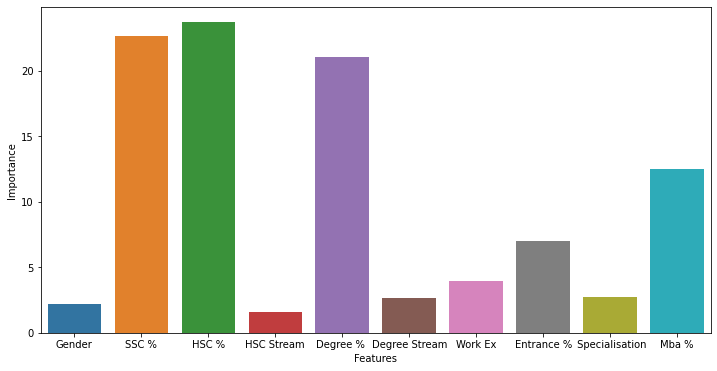

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(Fec.Features,Fec.Importance)
plt.show()

From the above bar chart we know that If we have a 5 percentage minimum confidence bound then, The important features which decide one probability of getting placed are- SSC%, HSC%, Degree%, MBA%, Work EX and Entrance % .

#**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split

In [0]:
Log_model = LogisticRegression()

In [156]:
Log_model.fit(X_train,y_train)
y_pred = Log_model.predict(X_test)
print('Accuracy -> ',accuracy_score(y_test,y_pred)*100)
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))

Accuracy ->  86.15384615384616
Confusion Matrix : 
 [[16  5]
 [ 4 40]]


###**Now, Let's try increasing the Accuracy of this MODEL by Tuning its Hyperparameters :**

In [0]:
import numpy as np
parameters = [{'penalty' : ['l2','l1'],
               'C' : np.logspace(0, 4, 10),
               'class_weight' : ['balanced',None],
               'multi_class' : ['ovr','auto'],
               'max_iter' : np.arange(50,130,10)},
              {'penalty' : ['l2'],
               'C' : np.logspace(0, 4, 10),
               'class_weight' : ['balanced',None],
               'max_iter' : np.arange(50,130,10),
               'solver' : ['newton-cg','saga','sag','liblinear'],
               'multi_class' : ['ovr','auto']}]

In [157]:
Log_grid = GridSearchCV(estimator=Log_model,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
Log_grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e+00, 2.7...
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'class_weight': ['balanced', None],
                          'max_iter': array([ 50,  60,  70,  80,  90, 100, 110, 120]),
                          'mult

##**The BEST PARAMETERS obtained for Logistic Regression MODEL are :**

In [143]:
Log_grid.best_params_

{'C': 1.0,
 'class_weight': 'balanced',
 'max_iter': 80,
 'multi_class': 'ovr',
 'penalty': 'l2'}

Let's create a MODEL by using these HYPERARAMETER values :

In [0]:
Log_model_grid = LogisticRegression(C= 1.0,
 class_weight= 'balanced',
 max_iter= 80,
 multi_class= 'ovr',
 penalty= 'l2')

In [158]:
print('Accuracy after doing HYPERPARAMETER Tuning -> ',cross_val_score(Log_model_grid,X,y,cv=10).mean()*100,'%')

Accuracy after doing HYPERPARAMETER Tuning ->  88.87445887445887 %


Now, as we can see their is Slight Increase in Accuracy after doing Hyperparameter Tuning.

#**Conclusion**

In this notebook, we explored dataset containing campus recruitment data for students from an MBA college. Though our analysis, we found that:



1.   The board of school education doesnt matter when it comes to placements or even salaries.
2.   Placed students seem to have performed better in their 10th and 12th exams than Non Placed Students
3.   Among the various specializations, students with a Sci&Tech UG degree and Mkt&Fin MBA specialization appear to have slightly higher salaries.
4.   The salaries for female students seems to be generally slightly lower than men.




##**Prediction of Salary (Regression using Ensemble models)**

In [0]:
#Dropping non-numerical columns and primary keys
salary_data = df.drop(columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status','sl_no','etest_p'])

In [0]:
#Dropping null values
salary_data.dropna(inplace=True)

In [0]:
#View modified data
salary_data

,ssc_p,hsc_p,degree_p,mba_p,salary
0,67.00,91.00,58.00,58.80,270000.0
1,79.33,78.33,77.48,66.28,200000.0
2,65.00,68.00,64.00,57.80,250000.0
4,85.80,73.60,73.30,55.50,425000.0
7,82.00,64.00,66.00,62.14,252000.0
...,...,...,...,...,...
209,62.00,72.00,65.00,56.49,216000.0
210,80.60,82.00,77.60,74.49,400000.0
211,58.00,60.00,72.00,53.62,275000.0
212,67.00,67.00,73.00,69.72,295000.0


In [0]:
X=salary_data.drop("salary",axis=1)
y=salary_data["salary"]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1001)

In [0]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from sklearn.linear_model import  Lasso,Ridge

In [0]:
xgb=XGBRegressor(learning_rate=0.01,n_estimators=1000)
Rf=RandomForestRegressor(n_estimators=1000)
gb=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
lgb=LGBMRegressor(boosting_type='gbdt',objective='huber',learning_rate=0.01,n_estimators=1000,metric='rmse')
lassoreg=Lasso(alpha=0.1,normalize=True)
rodgreg=Ridge(alpha=0.1,normalize=True)

In [0]:
lgb.fit(X_train,y_train)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
              objective='huber', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [0]:
pred_1 = lgb.predict(X_test)

-0.010659602395452827


In [0]:
actual_values = pd.DataFrame({'actual_salary':y_test})
actual_values.index = X_test.index

actual_values.to_csv("Actual_Salaries.csv", index=False)

actual_values

,actual_salary
195,275000.0
171,290000.0
185,252000.0
4,425000.0
178,350000.0
28,350000.0
85,400000.0
88,210000.0
95,420000.0
129,250000.0


In [0]:

model_preds = pd.DataFrame({'predicted_salary':pred_1})
model_preds.index = X_test.index

model_preds.to_csv("Predicted_Salaries.csv",index=False)

model_preds

,predicted_salary
195,286790.110170
171,286799.610169
185,286799.610169
4,286792.753027
178,286798.410169
28,286791.210170
85,286799.610169
88,286798.410169
95,286791.210170
129,286791.210170


In [0]:
Rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
pred_2 = Rf.predict(X_test)

In [0]:

model_preds = pd.DataFrame({'predicted_salary':pred_2})
model_preds.index = X_test.index

model_preds.to_csv("Predicted_Salaries.csv",index=False)

model_preds

,predicted_salary
195,264983.0
171,300707.0
185,299196.0
4,268078.0
178,334034.0
28,277530.0
85,346194.0
88,277974.0
95,284107.0
129,260545.0


In [0]:
xgb.fit(X_train,y_train)
ped_3=xgb.predict(X_test)

[12:15:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:

model_preds = pd.DataFrame({'predicted_salary':ped_3})
model_preds.index = X_test.index

model_preds.to_csv("Predicted_Salaries.csv",index=False)

model_preds

,predicted_salary
195,273222.750000
171,276384.812500
185,326138.031250
4,248441.296875
178,393220.843750
28,275364.843750
85,330602.500000
88,289980.593750
95,307296.343750
129,264892.250000
